Importing Library

In [155]:
import pandas as pd
import numpy as np

In [156]:
df=pd.read_csv('/content/EastWestAirlines.csv')

In [157]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [158]:
#drop column
airline=df.drop(["ID#",	"Award?"],axis=1)

In [159]:
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [160]:
airline.shape

(3999, 10)

In [161]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.5 KB


In [162]:
airline.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [163]:
#normalizing data

In [164]:
from sklearn.preprocessing import scale 

In [165]:
airline_array=airline.values

In [166]:
airline_norm=scale(airline_array)

In [167]:
airline_norm

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

### **Hclustering**

In [168]:
#importing library for Hclustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

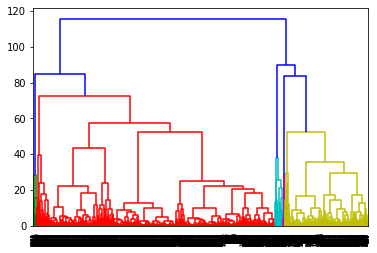

In [169]:
# create dendrogram{method="ward}
dendrogram=sch.dendrogram(sch.linkage(airline_norm, method="ward"))

In [170]:
#creating cluster
hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")

In [171]:
y_hc=hc.fit_predict(airline_norm)
y_hc

array([0, 0, 0, ..., 0, 0, 0])

In [172]:
import sklearn
sklearn.metrics.silhouette_score(airline_norm,y_hc)

0.32701816589484084

In [173]:
hcrime=df.copy()
hcrime["hcluster"]=y_hc
hcrime

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hcluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [174]:
hcrime["hcluster"].value_counts()

0    2850
1     992
2      96
3      43
4      18
Name: hcluster, dtype: int64

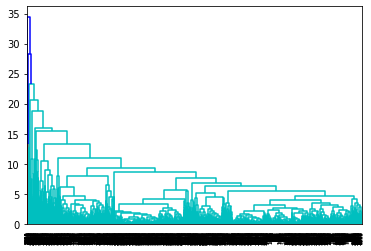

In [175]:
# create dendrogram{method="complete}
dendrogram=sch.dendrogram(sch.linkage(airline_norm, method="complete"))

In [176]:
#creating cluster
hc=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")

In [177]:
y_hc=hc.fit_predict(airline_norm)
y_hc

array([0, 0, 0, ..., 0, 0, 0])

In [178]:
import sklearn
sklearn.metrics.silhouette_score(airline_norm,y_hc)

0.7938964005121698

In [179]:
airlineH=df.copy()
airlineH["hcluster"]=y_hc
airlineH

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hcluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [180]:
airlineH["hcluster"].value_counts()

0    3980
2      15
1       4
Name: hcluster, dtype: int64

As we know the hclustering for large data set the dendrofram makes confusion 
for n_cluster=5 the silhouette_score=0.32
and n_cluster=3 the silhouette_score=0.79
silhouette score 0.72 means near to 1 it means the model is good



## **KMeans clustering**

In [181]:
from sklearn.cluster import KMeans
import  matplotlib.pyplot as plt

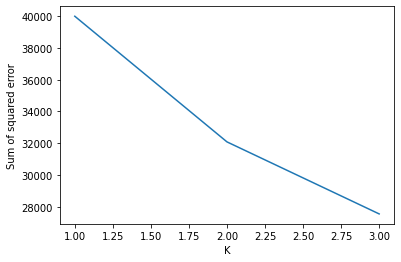

In [182]:
sse=[]
k_rng =range(1,4)
for k in k_rng:
    km =KMeans(n_clusters=k)
    km.fit(airline_norm)
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [183]:
model=KMeans(n_clusters=2,random_state=30).fit(airline_norm)
model.labels_ 

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [184]:
airlinek=df.copy()
airlinek["kcluster"]=model.labels_ 
airlinek.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kcluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [185]:
airlinek["kcluster"].value_counts()

1    2793
0    1206
Name: kcluster, dtype: int64

In [186]:
sklearn.metrics.silhouette_score(airline_norm,model.labels_ )

0.35826638416515033

## **DBSCAN**

In [187]:
#import libray for DBSCAN
from sklearn.cluster import DBSCAN

In [188]:
# eps =0.40

In [189]:
dbscan=DBSCAN(eps=0.40,min_samples=11)
dbscan.fit(airline_norm)

DBSCAN(eps=0.4, min_samples=11)

In [190]:
dbscan.labels_

array([ 0,  0,  0, ..., -1,  0,  0])

In [191]:
import sklearn
sklearn.metrics.silhouette_score(airline_norm,dbscan.labels_)

-0.12756459739485895

In [192]:
# eps =0.70
dbscan=DBSCAN(eps=0.70,min_samples=5)
dbscan.fit(airline_norm)

DBSCAN(eps=0.7)

In [193]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [194]:
airlineD=df.copy()
airlineD["dcluster"]=dbscan.labels_
airlineD.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dcluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1


In [195]:
airlineD["dcluster"].value_counts()

 0     1940
-1      771
 1      506
 4      387
 2      235
 3      116
 6       15
 10       9
 7        6
 5        5
 8        5
 9        4
Name: dcluster, dtype: int64

In [196]:
import sklearn
sklearn.metrics.silhouette_score(airline_norm,dbscan.labels_)

0.025151317808483207

comparing silhouette score of H,k & DBSCAN It is cleard that the h & k are good for us beacuse of score of both is in +ve and closer to one and DBSCAN score for eps=40 is in -ve and eps=70 silhoutte score is near to zero(ocerlaping cluster)